## Checkpoint 9: Association rules
##### by: Yasmine TOLBA

In [186]:
import mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
import csv
from mlxtend.frequent_patterns import apriori, association_rules


### Step 1: Getting familiar with our dataset

In [187]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
#lets make a dataframe using one hot encoding with our dataset
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)     #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [188]:
#counting how many of each item there is
df[df==True].count(axis=0)

Dress         2
Earrings      2
Hat           3
Heels         2
Necklace      1
Pants         4
Sandals       1
Scarf         4
Shirt         1
Skirt         3
Sneakers      2
Sunglasses    1
dtype: int64

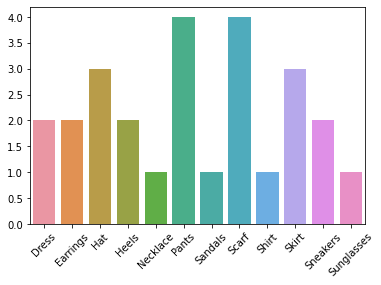

In [189]:
#we plot the count for each item to vizualize it
sns.barplot(x=df[df==True].count(axis=0).index,y=df[df==True].count(axis=0).values)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

### Step 2: using Apriori

In [190]:
#we use apriori with our one hot dataset
apriori(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Dress, Heels)"
9,0.4,"(Dress, Scarf)"


In [191]:
matrix = association_rules(apriori(df, min_support=0.3, use_colnames=True),metric="lift",min_threshold=1, support_only = False).sort_values(by= ['lift'],ascending=False)
matrix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
19,"(Dress, Scarf)",(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
21,(Dress),"(Heels, Scarf)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
22,(Heels),"(Dress, Scarf)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
31,"(Hat, Pants)",(Sneakers),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
43,"(Scarf, Pants)",(Skirt),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Skirt),(Hat),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,(Hat),(Skirt),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
26,"(Skirt, Pants)",(Hat),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


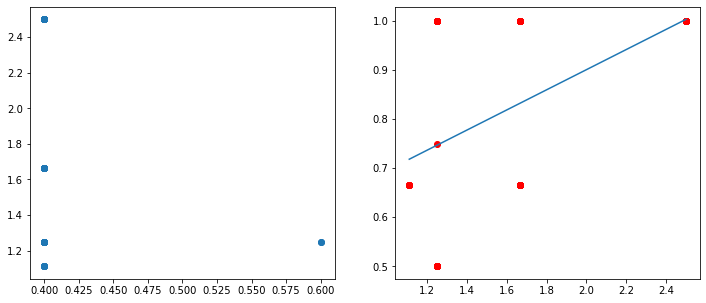

In [192]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].scatter(matrix.support, matrix.lift)
fit = np.polyfit(matrix['lift'], matrix['confidence'], 1)
fit_fn = np.poly1d(fit)
axs[1].plot(matrix['lift'], matrix['confidence'], 'ro', matrix['lift'], fit_fn(matrix['lift']))

### Conclusions:
So we can see from our association rules table, that customers tend to buy items that go nicely together to coordinate an outfit, like heels, dresses and scarves. Another example is sneakers, jeans and hats. it is better to market outfits by style such as :everyday wear and formal wear.

## Larger Dataset

In [193]:
with open('Market_Basket_Optimisation.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

te=TransactionEncoder()
te_ary=te.fit(data).transform(data)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


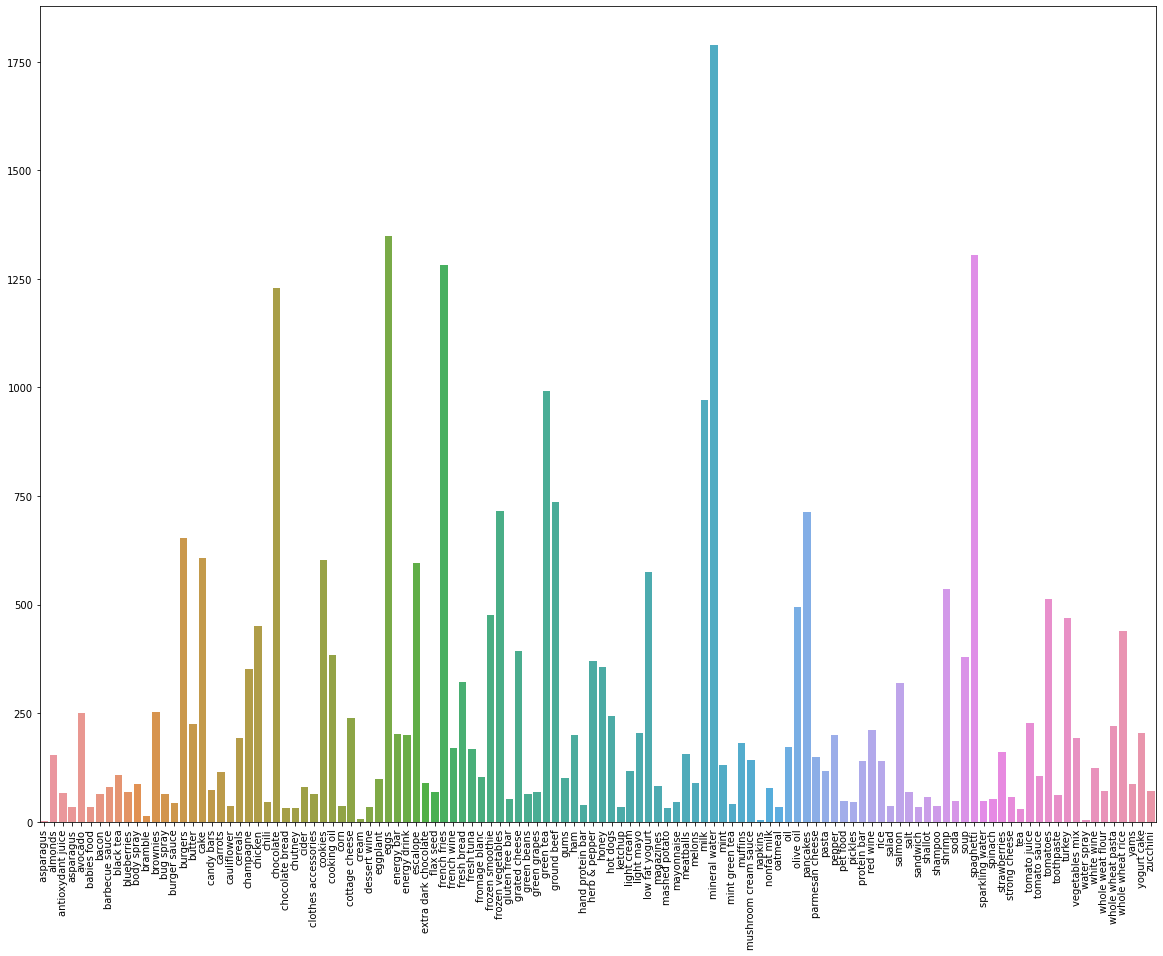

In [185]:
plt.figure(figsize=(20,15))
sns.barplot(x=df[df==True].count(axis=0).index,y=df[df==True].count(axis=0).values)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

In [197]:
apriori(df, min_support=0.03, use_colnames=True).sort_values(['support'], ascending = False)

,support,itemsets
25,0.238368,(mineral water)
11,0.179709,(eggs)
31,0.174110,(spaghetti)
13,0.170911,(french fries)
7,0.163845,(chocolate)
18,0.132116,(green tea)
24,0.129583,(milk)
19,0.098254,(ground beef)
16,0.095321,(frozen vegetables)
27,0.095054,(pancakes)


In [201]:
matrix = association_rules(apriori(df, min_support=0.03, use_colnames=True),metric="lift",min_threshold=0.7, support_only = False).sort_values(by= ['confidence'], ascending=False)
matrix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
26,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
21,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
29,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
32,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
35,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
7,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
14,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
30,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
34,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


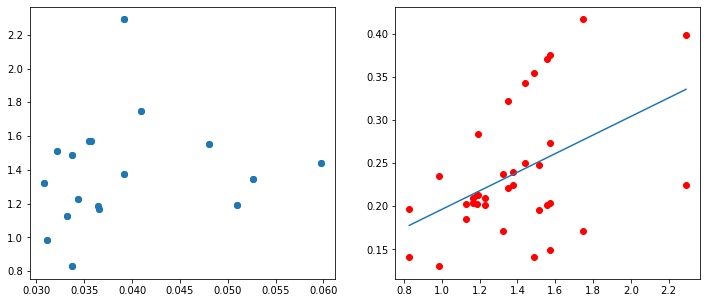

In [196]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].scatter(matrix.support, matrix.lift)
fit = np.polyfit(matrix['lift'], matrix['confidence'], 1)
fit_fn = np.poly1d(fit)
axs[1].plot(matrix['lift'], matrix['confidence'], 'ro', matrix['lift'], fit_fn(matrix['lift']))
#axs[1].scatter(matrix.lift, matrix.confidence)

### Conclusion
just like the smaller dataset people tend to buy groceries with a certain meal in mind. people buy the ingredients for a recipe, just like spaghetti and ground beef, people buy these to make bolognese. eggs and chocolate to make cake, and water and tea to make tea. water is an extremely important item to have an abundance of in households, which is why it is found everywhere in our association rules table. <br>
so the best marketing strategy is to recommend ingredients from common dishes and recipes together.